# Applying Classification Modeling


## Import libraries and data

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [220]:
df=pd.read_csv('dem_candidates2.csv')

In [221]:
df2=pd.read_csv('2016-precinct-house.csv',encoding="ISO-8859-1")

In [222]:
df3=pd.read_csv('election-context-2018.csv')

## 1. Data Cleaning

### Dem Midterm Primary 2018 Data

In [5]:
df.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Gender',
       'Race', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?',
       'STEM?', 'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

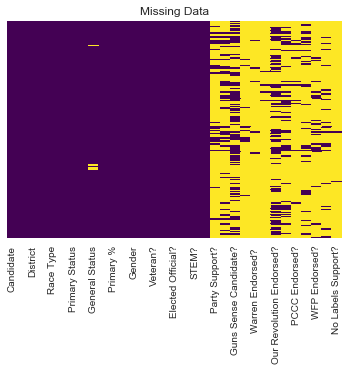

In [223]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [224]:
dem_primary_2018=df[['Candidate', 'State', 'District', 'Office Type',
        'Partisan Lean', 'Primary %', 'Won Primary','Gender', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?','Obama Alum?']]

In [7]:
dem_primary_2018.head(10)

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-28.879999,3.420000,No,Male,Nonwhite,Yes,No,No,No,No,No
1,Christopher Countryman,AL,Governor of Alabama,Governor,-28.879999,1.740000,No,Male,White,No,Yes,No,No,No,No
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-28.879999,3.270000,No,Male,White,Yes,No,No,No,No,No
3,James C. Fields,AL,Governor of Alabama,Governor,-28.879999,8.000000,No,Male,Nonwhite,Yes,No,Yes,No,No,No
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-28.879999,28.980000,No,Female,White,No,No,Yes,No,No,No
5,Walt Maddox,AL,Governor of Alabama,Governor,-28.879999,54.599998,Yes,Male,White,No,No,Yes,No,No,No
6,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,-30.680000,19.230000,No,Female,Nonwhite,No,No,No,No,Yes,No
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,-30.680000,80.769997,Yes,Male,Nonwhite,Yes,No,No,No,No,No
8,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,-33.080002,39.560001,No,Female,Nonwhite,Yes,No,No,No,No,No
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,-33.080002,60.439999,Yes,Female,White,No,No,No,No,No,No


Text(0.5, 1.0, 'Missing Data')

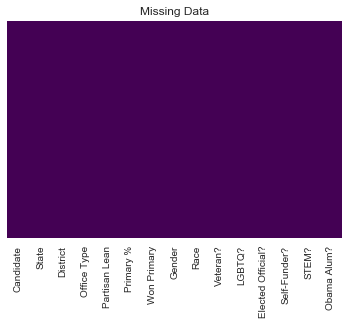

In [225]:
sns.heatmap(dem_primary_2018.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [9]:
dem_primary_2018.State.unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'MD', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WA', 'WV'], dtype=object)

### Congressional Districts by County Data

In [12]:
df2.columns

Index(['year', 'stage', 'special', 'state', 'state_postal', 'state_fips',
       'state_icpsr', 'county_name', 'county_fips', 'county_ansi',
       'county_lat', 'county_long', 'jurisdiction', 'precinct', 'candidate',
       'candidate_normalized', 'office', 'district', 'writein', 'party',
       'mode', 'votes', 'candidate_opensecrets', 'candidate_wikidata',
       'candidate_party', 'candidate_last', 'candidate_first',
       'candidate_middle', 'candidate_full', 'candidate_suffix',
       'candidate_nickname', 'candidate_fec', 'candidate_fec_name',
       'candidate_google', 'candidate_govtrack', 'candidate_icpsr',
       'candidate_maplight'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

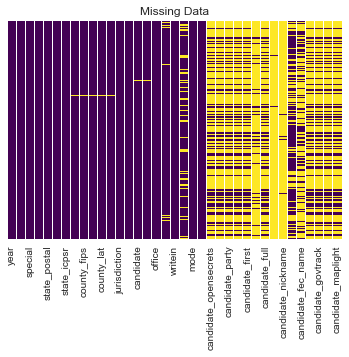

In [226]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [227]:
df2.shape

(1127515, 37)

In [16]:
df2.state_postal.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [228]:
df2 = df2[['state', 'state_postal', 'county_fips',
           'jurisdiction', 'office', 'district']]

In [229]:
df2 = df2[df2.state_postal.isin(['AL', 'AR', 'AZ', 'CA', 'CO', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
                                 'KY', 'MD', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
                                 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX',
                                 'UT', 'VA', 'WA', 'WV'])]

In [230]:
df2 = df2[df2.office.isin(['US House'])]

In [231]:
df2.head()

,state,state_postal,county_fips,jurisdiction,office,district
0,Alabama,AL,1001.0,Autauga,US House,2.0
3,Alabama,AL,1001.0,Autauga,US House,2.0
4,Alabama,AL,1001.0,Autauga,US House,2.0
5,Alabama,AL,1001.0,Autauga,US House,2.0
8,Alabama,AL,1001.0,Autauga,US House,2.0


In [232]:
df2.shape

(995179, 6)

Text(0.5, 1.0, 'Missing Data')

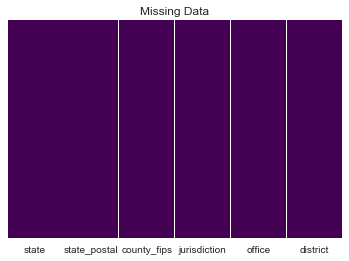

In [233]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [236]:
df2 = df2.dropna()

In [234]:
df2 = df2.drop_duplicates()

In [237]:
df2.shape

(4999, 6)

In [238]:
df2.district = df2.district.astype(int)

In [239]:
df2.district = df2.district.astype(str)

In [240]:
df2.county_fips = df2.county_fips.astype(int)

In [241]:
df2['House_District'] = df2[['office', 'district']].apply(
    lambda x: ' '.join(x), axis=1)

In [242]:
df2 = df2.drop(columns=['office', 'district'])

In [243]:
df2.House_District = df2.House_District.apply(
    lambda x: x.replace('US House', 'U.S. House District'))

In [244]:
df2=df2.reset_index(drop=True)

In [245]:
districts = []
for i in df2.index:
    districts.append(df2.loc[i].House_District.replace(
        'U.S. House District ', 'U.S. House {} District '.format(df2.loc[i].state)))
districts

['U.S. House Alabama District 2',
 'U.S. House Alabama District 1',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 7',
 'U.S. House Alabama District 1',
 'U.S. House Alabama District 7',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 7',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 2',
 'U.S. House A

In [246]:
df2.House_District = districts

In [247]:
cong_districts = df2

In [248]:
cong_districts.shape

(4999, 5)

In [249]:
len(cong_districts.county_fips.unique())

2731

In [250]:
len(cong_districts.House_District.unique())

360

In [251]:
cong_districts.head()

,state,state_postal,county_fips,jurisdiction,House_District
0,Alabama,AL,1001,Autauga,U.S. House Alabama District 2
1,Alabama,AL,1003,Baldwin,U.S. House Alabama District 1
2,Alabama,AL,1005,Barbour,U.S. House Alabama District 2
3,Alabama,AL,1007,Bibb,U.S. House Alabama District 6
4,Alabama,AL,1009,Blount,U.S. House Alabama District 4


Text(0.5, 1.0, 'Missing Data')

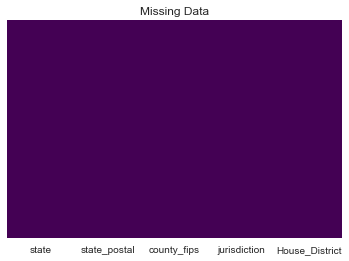

In [252]:
sns.heatmap(cong_districts.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

### County Demographics Data

In [42]:
df3.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')

In [253]:
df3=df3.drop(columns=['repgov14', 'demgov14', 'othergov14', 'ruralurban_cc','otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14','otherpres16'])

In [254]:
df3.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'romney12',
       'obama12', 'total_population', 'cvap', 'white_pct', 'black_pct',
       'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct',
       'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct'],
      dtype='object')

In [255]:
df3=df3[df3.state.isin(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Maryland', 'Michigan', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Washington', 'West Virginia'])]

In [256]:
len(df3.fips.unique())

2742

In [257]:
county_demo=df3

In [258]:
county_demo.head()

,state,county,fips,trump16,clinton16,romney12,obama12,total_population,cvap,white_pct,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Alabama,Autauga,1001,18172,5936,17379,6363,55049.0,40690.0,75.683482,...,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162
1,Alabama,Baldwin,1003,72883,18458,66016,18424,199510.0,151770.0,83.178788,...,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099
2,Alabama,Barbour,1005,5454,4871,5550,5912,26614.0,20375.0,45.885624,...,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635
3,Alabama,Bibb,1007,6738,1874,6132,2202,22572.0,17590.0,74.765196,...,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607
4,Alabama,Blount,1009,22859,2156,20757,2970,57704.0,42430.0,87.657701,...,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502


In [259]:
county_demo=county_demo.rename(index=str, columns={"fips": "county_fips"})

### Merging District Data with County Demographics

In [260]:
district_demo=pd.merge(cong_districts,county_demo,on='county_fips',how='left').drop(columns=['state_y','jurisdiction','state_x']).rename(columns={'state_postal':'State','House_District':'District',})

In [261]:
district_demo.columns

Index(['State', 'county_fips', 'District', 'county', 'trump16', 'clinton16',
       'romney12', 'obama12', 'total_population', 'cvap', 'white_pct',
       'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct',
       'female_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct'],
      dtype='object')

In [262]:
district_demo.District=district_demo.District.apply(
    lambda x: x.replace('District 0','At-large District'))

In [263]:
district_demo[district_demo.State=='ND']

,State,county_fips,District,county,trump16,clinton16,romney12,obama12,total_population,cvap,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
2497,ND,38001,U.S. House North Dakota At-large District,Adams,909.0,216.0,918.0,328.0,2348.0,1840.0,...,49.446337,32.282794,22.274276,53295.0,1.977848,4.042806,72.473246,3.904282,72.607053,100.000000
2498,ND,38003,U.S. House North Dakota At-large District,Barnes,3160.0,1597.0,2964.0,2394.0,11033.0,8705.0,...,50.811203,35.638539,20.384302,55778.0,2.774508,9.115664,76.322614,8.381423,75.831272,39.553588
2499,ND,38005,U.S. House North Dakota At-large District,Benson,929.0,842.0,868.0,1235.0,6802.0,4465.0,...,48.662158,49.117906,12.290503,41530.0,6.093328,15.022015,85.003885,7.998107,79.602461,100.000000
2500,ND,38007,U.S. House North Dakota At-large District,Billings,495.0,59.0,472.0,89.0,936.0,760.0,...,43.055556,31.730769,17.200855,67969.0,2.990654,9.898108,75.109170,8.941878,74.515648,100.000000
2501,ND,38009,U.S. House North Dakota At-large District,Bottineau,2494.0,736.0,2280.0,1183.0,6650.0,5240.0,...,47.548872,34.706767,21.308271,55958.0,2.342606,9.176875,78.723404,9.463437,78.605388,100.000000
2502,ND,38011,U.S. House North Dakota At-large District,Bowman,1446.0,227.0,1280.0,414.0,3238.0,2435.0,...,51.482397,37.090797,19.857937,62955.0,2.202146,10.248307,78.058691,8.933583,77.455566,100.000000
2503,ND,38013,U.S. House North Dakota At-large District,Burke,895.0,119.0,769.0,230.0,2239.0,1660.0,...,46.047343,38.142028,17.641804,65521.0,1.855124,11.059908,79.131007,9.536973,78.576365,100.000000
2504,ND,38015,U.S. House North Dakota At-large District,Burleigh,32532.0,10881.0,27951.0,14122.0,90560.0,69010.0,...,50.170053,40.061837,14.345186,66057.0,2.166190,6.595430,65.773467,6.147541,65.285302,18.547990
2505,ND,38017,U.S. House North Dakota At-large District,Cass,39816.0,31361.0,36855.0,34712.0,166852.0,124500.0,...,49.476182,46.798960,10.687316,54926.0,2.945508,5.530988,62.635722,4.244847,61.610342,10.434777
2506,ND,38019,U.S. House North Dakota At-large District,Cavalier,1357.0,476.0,1195.0,818.0,3867.0,3070.0,...,49.392294,30.928368,26.299457,65645.0,1.054217,9.000709,81.325301,8.840580,81.340580,100.000000


In [264]:
state_demo=district_demo.groupby('State').agg(
    {'county_fips':'mean', 'trump16':'sum',
       'clinton16':'sum', 'romney12':'sum', 'obama12':'sum', 'total_population':'sum', 'cvap':'sum',
       'white_pct':'mean', 'black_pct':'mean', 'hispanic_pct':'mean', 'nonwhite_pct':'mean',
       'foreignborn_pct':'mean', 'female_pct':'mean', 'age29andunder_pct':'mean',
       'age65andolder_pct':'mean', 'median_hh_inc':'mean', 'clf_unemploy_pct':'mean', 'lesshs_pct':'mean',
       'lesscollege_pct':'mean', 'lesshs_whites_pct':'mean', 'lesscollege_whites_pct':'mean',
       'rural_pct':'mean'})

In [265]:
state_demo=state_demo.drop('county_fips',axis=1)

In [266]:
state_demo.head()

,trump16,clinton16,romney12,obama12,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
State,,,,,,,,,,,,,,,,,,,,,
AL,1624371.0,1049139.0,1570192.0,1131048.0,6318571.0,4746280.0,65.195053,28.792347,3.232279,34.804947,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
AR,745765.0,414354.0,706785.0,431659.0,3246061.0,2377010.0,75.988946,15.962038,4.949779,24.011054,...,50.577838,37.290976,18.274512,37496.112500,8.072568,17.461241,84.485854,15.032359,83.083980,64.612389
AZ,7133381.0,6711275.0,7107008.0,5811569.0,38828990.0,26168610.0,54.813084,2.691113,30.395579,45.186916,...,49.806080,39.401028,18.403943,47223.066667,9.825836,15.597186,77.465699,7.740282,71.311100,23.156101
CA,27656242.0,66683855.0,30873973.0,59606842.0,285102677.0,176952445.0,46.346795,4.315412,34.639913,53.653205,...,49.928737,40.189001,14.329789,61594.112903,9.146370,17.425878,71.267332,6.359758,63.016986,16.332841
CO,2032202.0,2391819.0,2035396.0,2353434.0,9369738.0,6612020.0,74.260696,1.738853,20.023190,25.739304,...,48.626989,35.668748,16.560820,54886.040541,6.386869,9.526853,68.224182,5.023975,64.128036,52.956162


Text(0.5, 1.0, 'Missing Data')

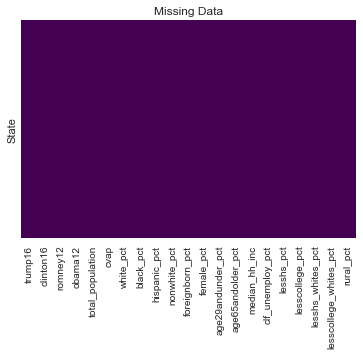

In [267]:
sns.heatmap(state_demo.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [268]:
district_demo=district_demo.groupby('District').agg(
    {'county_fips':'mean', 'trump16':'sum',
       'clinton16':'sum', 'romney12':'sum', 'obama12':'sum', 'total_population':'sum', 'cvap':'sum',
       'white_pct':'mean', 'black_pct':'mean', 'hispanic_pct':'mean', 'nonwhite_pct':'mean',
       'foreignborn_pct':'mean', 'female_pct':'mean', 'age29andunder_pct':'mean',
       'age65andolder_pct':'mean', 'median_hh_inc':'mean', 'clf_unemploy_pct':'mean', 'lesshs_pct':'mean',
       'lesscollege_pct':'mean', 'lesshs_whites_pct':'mean', 'lesscollege_whites_pct':'mean',
       'rural_pct':'mean'})

In [269]:
district_demo=district_demo.drop('county_fips',axis=1)

In [270]:
district_demo.head()

,trump16,clinton16,romney12,obama12,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
District,,,,,,,,,,,,,,,,,,,,,
U.S. House Alabama District 1,196911.0,107704.0,189168.0,116897.0,715407.0,538955.0,62.421312,31.573636,1.859663,37.578688,...,51.233432,37.559228,17.083995,38195.333333,14.212321,16.821231,83.693188,14.101545,80.603632,63.472636
U.S. House Alabama District 2,196234.0,120724.0,193585.0,135247.0,766884.0,577500.0,61.931329,32.230394,2.894009,38.068671,...,50.929505,38.372414,16.666009,39773.800000,9.871923,19.053105,82.115139,14.696447,78.455282,60.576053
U.S. House Alabama District 3,213495.0,145305.0,203531.0,160376.0,895137.0,677725.0,65.919591,28.728380,2.642469,34.080409,...,51.530851,38.391598,16.572277,40161.307692,8.769154,19.220803,82.191741,16.015776,79.880159,60.124535
U.S. House Alabama District 4,306535.0,84252.0,272325.0,103326.0,958907.0,722075.0,84.192999,7.762323,5.089680,15.807001,...,50.957847,36.702950,17.712331,39199.750000,7.916884,20.467307,85.448173,18.897830,84.637986,72.872175
U.S. House Alabama District 5,200644.0,97169.0,189920.0,103616.0,705034.0,530290.0,78.794090,12.353722,4.659365,21.205910,...,51.024700,37.420192,16.019160,48045.400000,8.091686,15.837995,76.076102,14.018572,74.537229,47.792088


Text(0.5, 1.0, 'Missing Data')

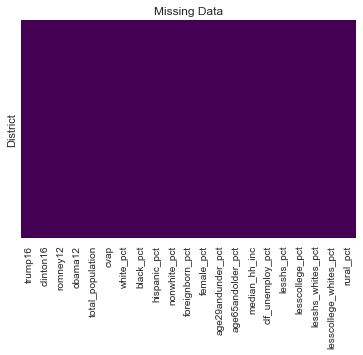

In [271]:
sns.heatmap(district_demo.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

### Merging Dem Primary Data with District Demographics

In [272]:
dem_primary_2018.shape

(800, 15)

In [273]:
district_demo.shape

(360, 21)

In [274]:
dem_primary_2018.head()

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-28.879999,3.42,No,Male,Nonwhite,Yes,No,No,No,No,No
1,Christopher Countryman,AL,Governor of Alabama,Governor,-28.879999,1.74,No,Male,White,No,Yes,No,No,No,No
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-28.879999,3.27,No,Male,White,Yes,No,No,No,No,No
3,James C. Fields,AL,Governor of Alabama,Governor,-28.879999,8.00,No,Male,Nonwhite,Yes,No,Yes,No,No,No
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-28.879999,28.98,No,Female,White,No,No,Yes,No,No,No


In [66]:
district_demo.head()

,trump16,clinton16,romney12,obama12,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
District,,,,,,,,,,,,,,,,,,,,,
U.S. House Alabama District 1,196911.0,107704.0,189168.0,116897.0,715407.0,538955.0,62.421312,31.573636,1.859663,37.578688,...,51.233432,37.559228,17.083995,38195.333333,14.212321,16.821231,83.693188,14.101545,80.603632,63.472636
U.S. House Alabama District 2,196234.0,120724.0,193585.0,135247.0,766884.0,577500.0,61.931329,32.230394,2.894009,38.068671,...,50.929505,38.372414,16.666009,39773.800000,9.871923,19.053105,82.115139,14.696447,78.455282,60.576053
U.S. House Alabama District 3,213495.0,145305.0,203531.0,160376.0,895137.0,677725.0,65.919591,28.728380,2.642469,34.080409,...,51.530851,38.391598,16.572277,40161.307692,8.769154,19.220803,82.191741,16.015776,79.880159,60.124535
U.S. House Alabama District 4,306535.0,84252.0,272325.0,103326.0,958907.0,722075.0,84.192999,7.762323,5.089680,15.807001,...,50.957847,36.702950,17.712331,39199.750000,7.916884,20.467307,85.448173,18.897830,84.637986,72.872175
U.S. House Alabama District 5,200644.0,97169.0,189920.0,103616.0,705034.0,530290.0,78.794090,12.353722,4.659365,21.205910,...,51.024700,37.420192,16.019160,48045.400000,8.091686,15.837995,76.076102,14.018572,74.537229,47.792088


In [277]:
Dem_Midterm_Primary=pd.merge(dem_primary_2018,district_demo,on='District',how='left')

In [278]:
Dem_Midterm_Primary.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'Won Primary', 'Gender', 'Race', 'Veteran?', 'LGBTQ?',
       'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?', 'trump16',
       'clinton16', 'romney12', 'obama12', 'total_population', 'cvap',
       'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct'],
      dtype='object')

In [70]:
Dem_Midterm_Primary.head(10)

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-28.879999,3.420000,No,Male,Nonwhite,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,-28.879999,1.740000,No,Male,White,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-28.879999,3.270000,No,Male,White,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,-28.879999,8.000000,No,Male,Nonwhite,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-28.879999,28.980000,No,Female,White,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Walt Maddox,AL,Governor of Alabama,Governor,-28.879999,54.599998,Yes,Male,White,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,-30.680000,19.230000,No,Female,Nonwhite,No,...,51.233432,37.559228,17.083995,38195.333333,14.212321,16.821231,83.693188,14.101545,80.603632,63.472636
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,-30.680000,80.769997,Yes,Male,Nonwhite,Yes,...,51.233432,37.559228,17.083995,38195.333333,14.212321,16.821231,83.693188,14.101545,80.603632,63.472636
8,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,-33.080002,39.560001,No,Female,Nonwhite,Yes,...,50.929505,38.372414,16.666009,39773.800000,9.871923,19.053105,82.115139,14.696447,78.455282,60.576053
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,-33.080002,60.439999,Yes,Female,White,No,...,50.929505,38.372414,16.666009,39773.800000,9.871923,19.053105,82.115139,14.696447,78.455282,60.576053


Text(0.5, 1.0, 'Missing Data')

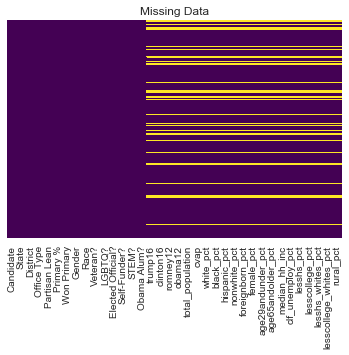

In [279]:
sns.heatmap(Dem_Midterm_Primary.isnull(), yticklabels=False,xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [280]:
gov_primary=Dem_Midterm_Primary[Dem_Midterm_Primary.isna().any(
    axis=1)]

Text(0.5, 1.0, 'Missing Data')

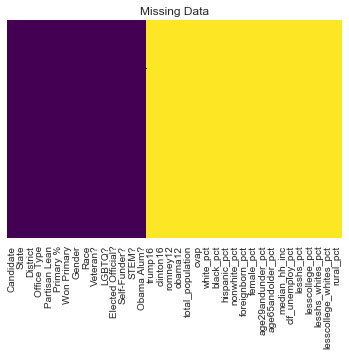

In [281]:
sns.heatmap(gov_primary.isnull(), yticklabels=False, xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')


In [282]:
statewide_races_demographics=pd.merge(gov_primary, state_demo,on='State',how='left')

In [283]:
statewide_races_demographics=statewide_races_demographics.drop(columns=['trump16_x', 'clinton16_x', 'romney12_x', 'obama12_x',
       'total_population_x', 'cvap_x', 'white_pct_x', 'black_pct_x',
       'hispanic_pct_x', 'nonwhite_pct_x', 'foreignborn_pct_x', 'female_pct_x',
       'age29andunder_pct_x', 'age65andolder_pct_x', 'median_hh_inc_x',
       'clf_unemploy_pct_x', 'lesshs_pct_x', 'lesscollege_pct_x',
       'lesshs_whites_pct_x', 'lesscollege_whites_pct_x', 'rural_pct_x'])

Text(0.5, 1.0, 'Missing Data')

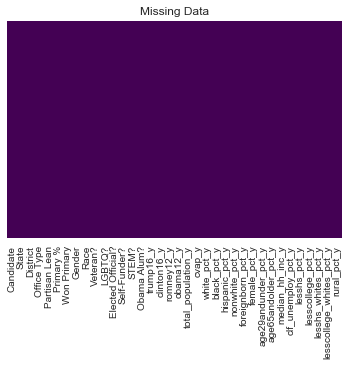

In [284]:
sns.heatmap(statewide_races_demographics.isnull(), yticklabels=False,xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [285]:
columns=[]
for i in statewide_races_demographics.columns:
    columns.append(i.replace('_y',''))
statewide_races_demographics.columns=columns

In [286]:
statewide_races_demographics.head(10)

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-28.879999,3.420000,No,Male,Nonwhite,Yes,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
1,Christopher Countryman,AL,Governor of Alabama,Governor,-28.879999,1.740000,No,Male,White,No,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-28.879999,3.270000,No,Male,White,Yes,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
3,James C. Fields,AL,Governor of Alabama,Governor,-28.879999,8.000000,No,Male,Nonwhite,Yes,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-28.879999,28.980000,No,Female,White,No,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
5,Walt Maddox,AL,Governor of Alabama,Governor,-28.879999,54.599998,Yes,Male,White,No,...,51.327904,37.978051,16.811869,39255.893333,9.953542,18.840458,82.546164,15.126964,79.350384,65.063668
6,Jared Henderson,AR,Governor of Arkansas,Governor,-28.639999,63.299999,Yes,Male,White,No,...,50.577838,37.290976,18.274512,37496.112500,8.072568,17.461241,84.485854,15.032359,83.083980,64.612389
7,Leticia Sanders,AR,Governor of Arkansas,Governor,-28.639999,36.700001,No,Female,Nonwhite,No,...,50.577838,37.290976,18.274512,37496.112500,8.072568,17.461241,84.485854,15.032359,83.083980,64.612389
8,Akinyemi Agbede,CA,Governor of California,Governor,25.830000,0.220000,No,Male,Nonwhite,No,...,49.928737,40.189001,14.329789,61594.112903,9.146370,17.425878,71.267332,6.359758,63.016986,16.332841
9,Albert Caesar Mezzetti,CA,Governor of California,Governor,25.830000,0.280000,No,Male,White,Yes,...,49.928737,40.189001,14.329789,61594.112903,9.146370,17.425878,71.267332,6.359758,63.016986,16.332841


In [288]:
district_primary=Dem_Midterm_Primary.dropna()

In [297]:
Dem_Midterm_Primary_Cleaned = pd.concat([statewide_races_demographics, district_primary], axis=0).sort_values(
    by=['State', 'Office Type']).reset_index(drop=True)


In [298]:
Dem_Midterm_Primary_Cleaned.shape

(800, 36)

Text(0.5, 1.0, 'Missing Data')

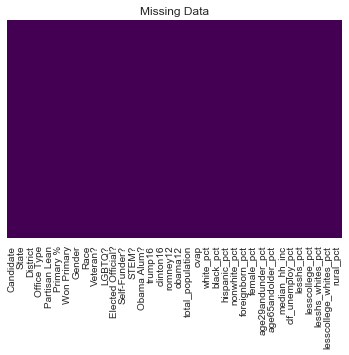

In [299]:
sns.heatmap(Dem_Midterm_Primary_Cleaned.isnull(), yticklabels=False,xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')

### Convert all values to a uniform unit of measurement

In [293]:
Dem_Midterm_Primary_Cleaned.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'Won Primary', 'Gender', 'Race', 'Veteran?', 'LGBTQ?',
       'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?', 'trump16',
       'clinton16', 'romney12', 'obama12', 'total_population', 'cvap',
       'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct'],
      dtype='object')

In [306]:
Dem_Midterm_Primary_Cleaned=Dem_Midterm_Primary_Cleaned.applymap(lambda x:x/100 if type(x) == float else x)

In [311]:
Dem_Midterm_Primary_Cleaned.median_hh_inc=Dem_Midterm_Primary_Cleaned.median_hh_inc*100

In [312]:
Dem_Midterm_Primary_Cleaned.head()

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-0.2888,0.0342,No,Male,Nonwhite,Yes,...,0.513279,0.379781,0.168119,39255.893333,0.099535,0.188405,0.825462,0.15127,0.793504,0.650637
1,Christopher Countryman,AL,Governor of Alabama,Governor,-0.2888,0.0174,No,Male,White,No,...,0.513279,0.379781,0.168119,39255.893333,0.099535,0.188405,0.825462,0.15127,0.793504,0.650637
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-0.2888,0.0327,No,Male,White,Yes,...,0.513279,0.379781,0.168119,39255.893333,0.099535,0.188405,0.825462,0.15127,0.793504,0.650637
3,James C. Fields,AL,Governor of Alabama,Governor,-0.2888,0.0800,No,Male,Nonwhite,Yes,...,0.513279,0.379781,0.168119,39255.893333,0.099535,0.188405,0.825462,0.15127,0.793504,0.650637
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-0.2888,0.2898,No,Female,White,No,...,0.513279,0.379781,0.168119,39255.893333,0.099535,0.188405,0.825462,0.15127,0.793504,0.650637


In [656]:
Dem_Midterm_Primary_Cleaned.shape

(800, 32)

Text(0.5, 1.0, 'Missing Data')

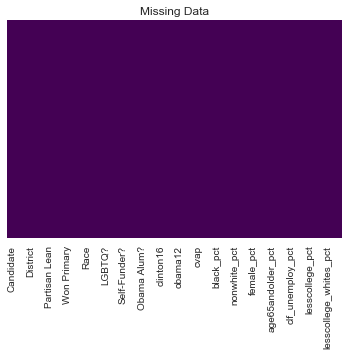

In [313]:
sns.heatmap(Dem_Midterm_Primary_Cleaned.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

## EDA

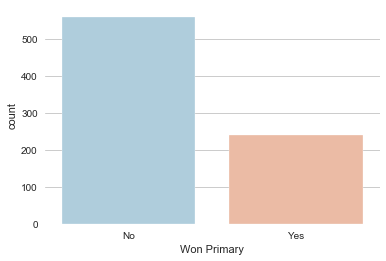

In [12]:
# visualize value counts of target column
sns.set_style('whitegrid')
sns.countplot(x='Won Primary',data=Dem_Midterm_Primary_Cleaned,palette='RdBu_r')

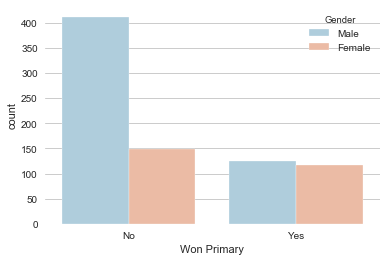

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Won Primary',hue='Gender',data=Dem_Midterm_Primary_Cleaned,palette='RdBu_r')

Text(0, 0.5, 'Primary Contenders')

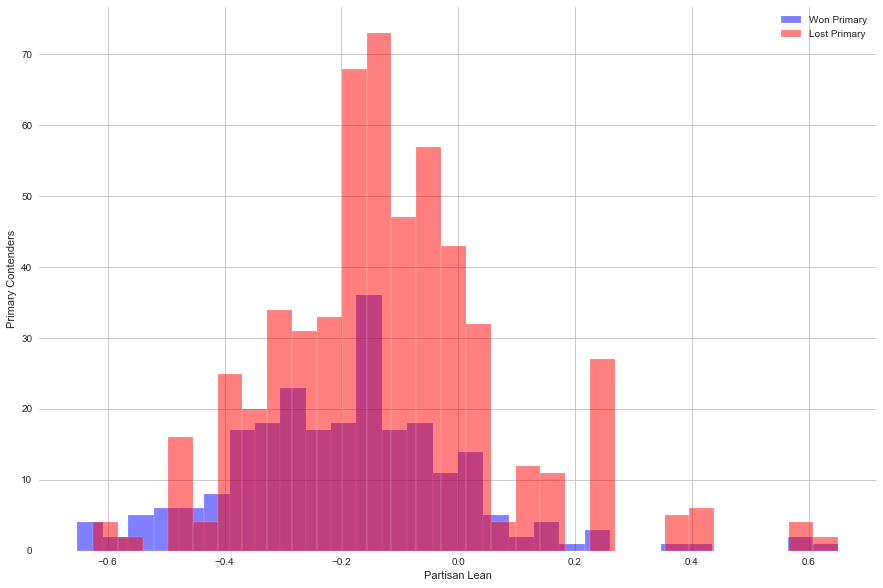

In [14]:
# look at the relationship between credit limit and default pay next month
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
Dem_Midterm_Primary_Cleaned[Dem_Midterm_Primary_Cleaned['Won Primary']=='Yes']['Partisan Lean'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Won Primary')
Dem_Midterm_Primary_Cleaned[Dem_Midterm_Primary_Cleaned['Won Primary']=='No']['Partisan Lean'].hist(alpha=0.5,color='red',
                                              bins=30,label='Lost Primary')
plt.legend()
plt.xlabel('Partisan Lean')
plt.ylabel('Primary Contenders')

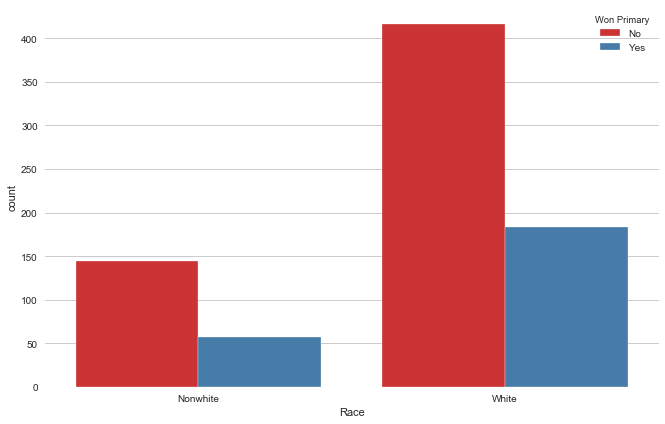

In [15]:
plt.figure(figsize=(11,7))
sns.countplot(x='Race',hue='Won Primary',data=Dem_Midterm_Primary_Cleaned,palette='Set1')

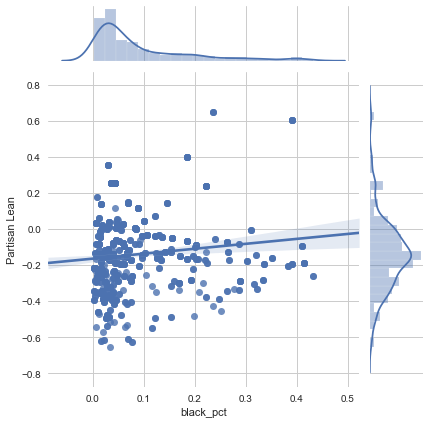

In [16]:
sns.jointplot(x='black_pct',y='Partisan Lean',data=Dem_Midterm_Primary_Cleaned,kind="reg")

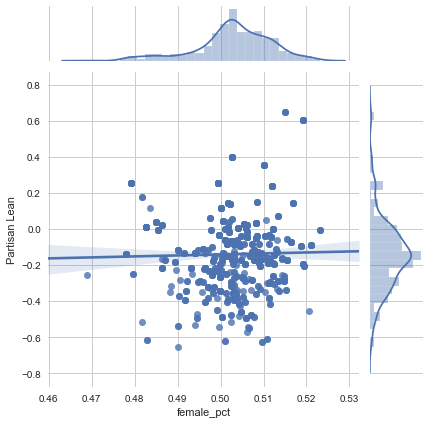

In [17]:
sns.jointplot(x='female_pct',y='Partisan Lean',data=Dem_Midterm_Primary_Cleaned,kind="reg")

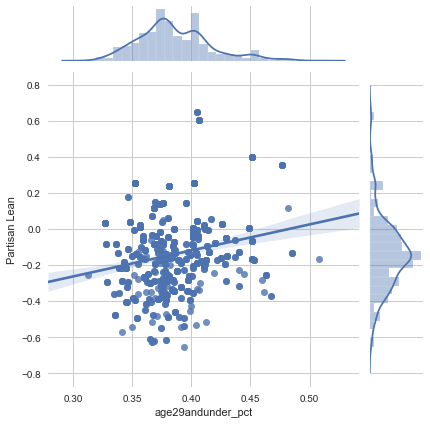

In [19]:
sns.jointplot(x='age29andunder_pct',y='Partisan Lean',data=Dem_Midterm_Primary_Cleaned,kind="reg")

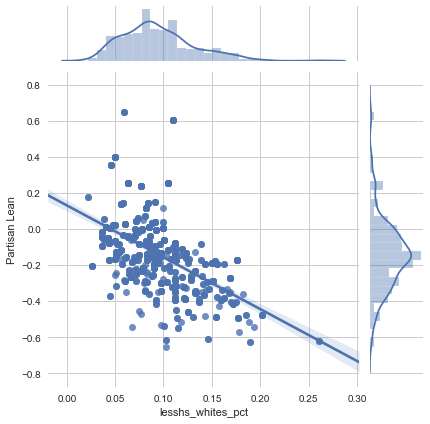

In [18]:
sns.jointplot(x='lesshs_whites_pct',y='Partisan Lean',data=Dem_Midterm_Primary_Cleaned,kind="reg")

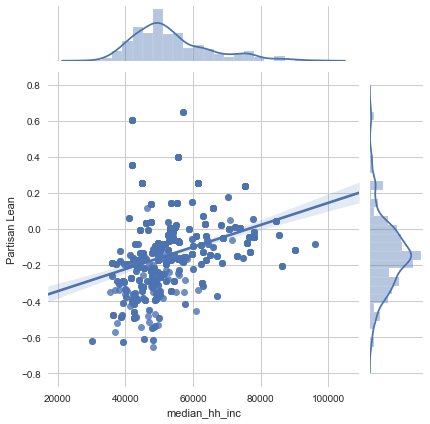

In [658]:
sns.jointplot(x='median_hh_inc',y='Partisan Lean',data=Dem_Midterm_Primary_Cleaned,kind="reg")

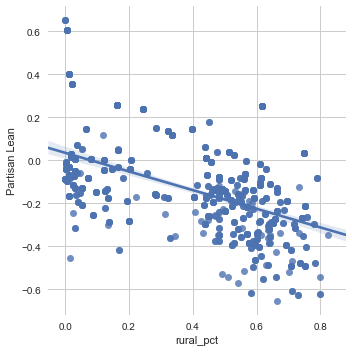

In [32]:
sns.lmplot(x='rural_pct',y='Partisan Lean',data=Dem_Midterm_Primary_Cleaned)

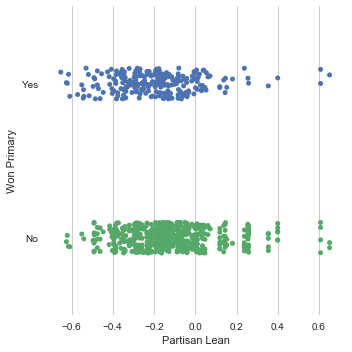

In [21]:
sns.catplot(x="Partisan Lean", y="Won Primary",order=["Yes", "No"],  data=Dem_Midterm_Primary_Cleaned);

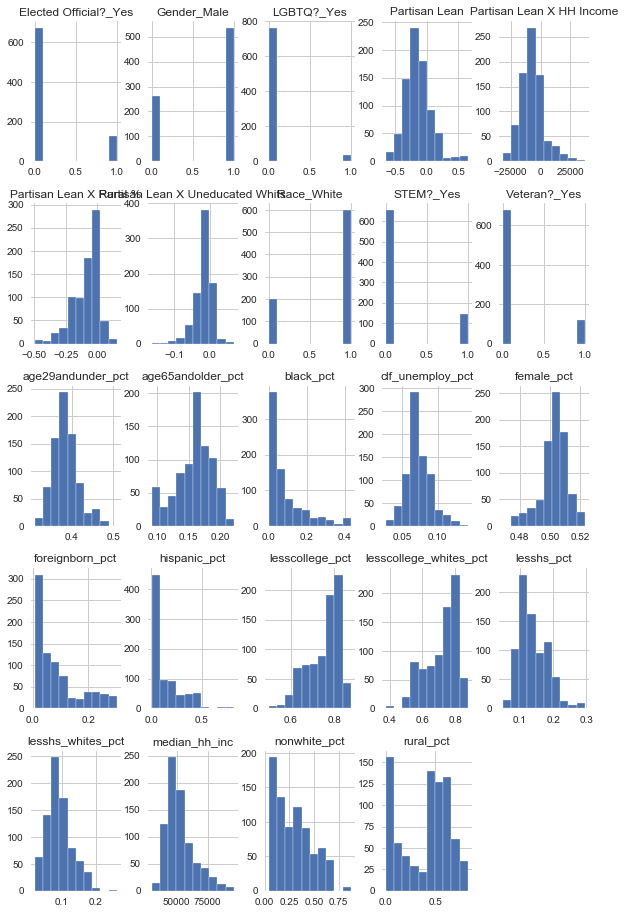

In [655]:
X.hist(figsize  = [10, 16]);

## Feature Engineering 

### Creating new variables

In [24]:
Dem_Midterm_Primary_Cleaned.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'Won Primary', 'Gender', 'Race', 'Veteran?', 'LGBTQ?',
       'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?',
       'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'Hillary_Won?', 'Obama_Won?'],
      dtype='object')

In [22]:
#Create a new column that states if Hillary won that region based on trump/hillary votes  2016

Hillary_Won = []
for i in Dem_Midterm_Primary_Cleaned.index:
    if Dem_Midterm_Primary_Cleaned.loc[i].clinton16>Dem_Midterm_Primary_Cleaned.loc[i].trump16:
        Hillary_Won.append(1)
    elif Dem_Midterm_Primary_Cleaned.loc[i].trump16>Dem_Midterm_Primary_Cleaned.loc[i].clinton16 :
        Hillary_Won.append(0)

Dem_Midterm_Primary_Cleaned['Hillary_Won?']=Hillary_Won

AttributeError: 'Series' object has no attribute 'clinton16'

In [23]:
#Create a new column that states if Obama won that region based on romney/obama votes in 2012

Obama_Won = []
for i in Dem_Midterm_Primary_Cleaned.index:
    if Dem_Midterm_Primary_Cleaned.loc[i].obama12>Dem_Midterm_Primary_Cleaned.loc[i].romney12:
        Obama_Won.append(1)
    elif Dem_Midterm_Primary_Cleaned.loc[i].romney12>Dem_Midterm_Primary_Cleaned.loc[i].obama12 :
        Obama_Won.append(0)

Dem_Midterm_Primary_Cleaned['Obama_Won?']=Obama_Won

AttributeError: 'Series' object has no attribute 'obama12'

In [319]:
Dem_Midterm_Primary_Cleaned=Dem_Midterm_Primary_Cleaned.drop(columns=['trump16',
       'clinton16', 'romney12', 'obama12', 'total_population', 'cvap'])

### Save clean file

In [3]:
output_file = 'Dem_Midterm_Primary_Cleaned.csv'
Dem_Midterm_Primary_Cleaned.to_csv(output_file)

NameError: name 'Dem_Midterm_Primary_Cleaned' is not defined

In [6]:
Dem_Midterm_Primary_Cleaned=pd.read_csv('Dem_Midterm_Primary_Cleaned.csv').drop(['Unnamed: 0'],axis=1)
Dem_Midterm_Primary_Cleaned.head(10)

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,...,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,Hillary_Won?,Obama_Won?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-0.2888,0.0342,No,Male,Nonwhite,Yes,...,0.168119,39255.893333,0.099535,0.188405,0.825462,0.151270,0.793504,0.650637,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,-0.2888,0.0174,No,Male,White,No,...,0.168119,39255.893333,0.099535,0.188405,0.825462,0.151270,0.793504,0.650637,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-0.2888,0.0327,No,Male,White,Yes,...,0.168119,39255.893333,0.099535,0.188405,0.825462,0.151270,0.793504,0.650637,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,-0.2888,0.0800,No,Male,Nonwhite,Yes,...,0.168119,39255.893333,0.099535,0.188405,0.825462,0.151270,0.793504,0.650637,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-0.2888,0.2898,No,Female,White,No,...,0.168119,39255.893333,0.099535,0.188405,0.825462,0.151270,0.793504,0.650637,0,0
5,Walt Maddox,AL,Governor of Alabama,Governor,-0.2888,0.5460,Yes,Male,White,No,...,0.168119,39255.893333,0.099535,0.188405,0.825462,0.151270,0.793504,0.650637,0,0
6,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,-0.3068,0.1923,No,Female,Nonwhite,No,...,0.170840,38195.333333,0.142123,0.168212,0.836932,0.141015,0.806036,0.634726,0,0
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,-0.3068,0.8077,Yes,Male,Nonwhite,Yes,...,0.170840,38195.333333,0.142123,0.168212,0.836932,0.141015,0.806036,0.634726,0,0
8,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,-0.3308,0.3956,No,Female,Nonwhite,Yes,...,0.166660,39773.800000,0.098719,0.190531,0.821151,0.146964,0.784553,0.605761,0,0
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,-0.3308,0.6044,Yes,Female,White,No,...,0.166660,39773.800000,0.098719,0.190531,0.821151,0.146964,0.784553,0.605761,0,0


### Creating dummy variables

In [25]:
Dem_Midterm_Primary_Cleaned.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'Won Primary', 'Gender', 'Race', 'Veteran?', 'LGBTQ?',
       'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?',
       'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'Hillary_Won?', 'Obama_Won?'],
      dtype='object')

In [7]:
# use pd.get_dummies to create a fixed larger dataframe that has new feature columns with dummy variables.
cat_feats = ['Gender', 'Race', 'Veteran?', 'LGBTQ?',
             'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?', 'Won Primary']
Dem_Midterm_Primary_Dummies = pd.get_dummies(
    Dem_Midterm_Primary_Cleaned, columns=cat_feats, drop_first=True)

Text(0.5, 1.0, 'Missing Data')

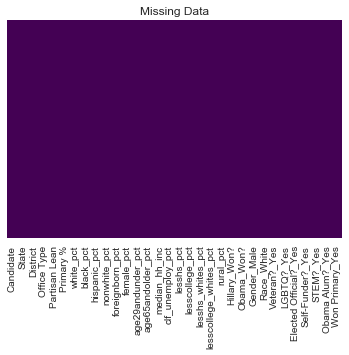

In [27]:
sns.heatmap(Dem_Midterm_Primary_Dummies.isnull(), yticklabels=False,xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [28]:
Dem_Midterm_Primary_Dummies.head()

,Candidate,State,District,Office Type,Partisan Lean,Primary %,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,Obama_Won?,Gender_Male,Race_White,Veteran?_Yes,LGBTQ?_Yes,Elected Official?_Yes,Self-Funder?_Yes,STEM?_Yes,Obama Alum?_Yes,Won Primary_Yes
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-0.2888,0.0342,0.651951,0.287923,0.032323,0.348049,...,0,1,0,1,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,-0.2888,0.0174,0.651951,0.287923,0.032323,0.348049,...,0,1,1,0,1,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-0.2888,0.0327,0.651951,0.287923,0.032323,0.348049,...,0,1,1,1,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,-0.2888,0.0800,0.651951,0.287923,0.032323,0.348049,...,0,1,0,1,0,1,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-0.2888,0.2898,0.651951,0.287923,0.032323,0.348049,...,0,0,1,0,0,1,0,0,0,0


### Creating an interaction variable

In [136]:
Dem_Midterm_Primary_Dummies.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'Hillary_Won?', 'Obama_Won?', 'Gender_Male', 'Race_White',
       'Veteran?_Yes', 'LGBTQ?_Yes', 'Elected Official?_Yes',
       'Self-Funder?_Yes', 'STEM?_Yes', 'Obama Alum?_Yes', 'Won Primary_Yes',
       'Partisan Lean X Uneducated Whits', 'Partisan Lean X HH Income',
       'Partisan Lean X Rural %'],
      dtype='object')

In [8]:
Dem_Midterm_Primary_Dummies['Partisan Lean X Uneducated Whits'] = Dem_Midterm_Primary_Dummies['Partisan Lean'] * \
    Dem_Midterm_Primary_Dummies['lesshs_whites_pct']

In [9]:
Dem_Midterm_Primary_Dummies['Partisan Lean X HH Income'] = Dem_Midterm_Primary_Dummies['Partisan Lean'] * \
    Dem_Midterm_Primary_Dummies['median_hh_inc']

In [10]:
Dem_Midterm_Primary_Dummies['Partisan Lean X Rural %'] = Dem_Midterm_Primary_Dummies['Partisan Lean'] * \
    Dem_Midterm_Primary_Dummies['rural_pct']

## 4. Feature Selection

In [11]:
# import libraries
from sklearn.model_selection import train_test_split

In [540]:
Dem_Midterm_Primary_Dummies.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'Hillary_Won?', 'Obama_Won?', 'Gender_Male', 'Race_White',
       'Veteran?_Yes', 'LGBTQ?_Yes', 'Elected Official?_Yes',
       'Self-Funder?_Yes', 'STEM?_Yes', 'Obama Alum?_Yes', 'Won Primary_Yes',
       'Partisan Lean X Uneducated Whits', 'Partisan Lean X HH Income',
       'Partisan Lean X Rural %'],
      dtype='object')

In [12]:
# define X and y
X = Dem_Midterm_Primary_Dummies.drop(columns=['Primary %','Candidate', 'State', 'District', 'Office Type','Won Primary_Yes'], axis=1)
y = Dem_Midterm_Primary_Dummies['Won Primary_Yes']

In [13]:
# create training and testing data sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

### Scaling the data

In [14]:
#Standardize the Variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)

#Use the .transform() method to transform the features to a scaled version.
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### Decision Tree for Feature Selection

In [15]:
# Training a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# Create an instance of DecisionTreeClassifier() called dtree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
# Calculate feature importances
importances = dtree.feature_importances_

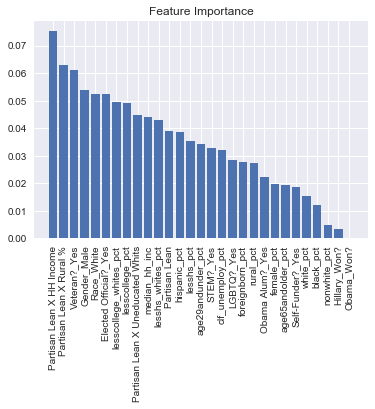

In [18]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [356]:
Dem_Midterm_Primary_Dummies.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'Hillary_Won?', 'Obama_Won?', 'Gender_Male', 'Race_White',
       'Veteran?_Yes', 'LGBTQ?_Yes', 'Elected Official?_Yes',
       'Self-Funder?_Yes', 'STEM?_Yes', 'Obama Alum?_Yes', 'Won Primary_Yes',
       'Partisan Lean X Uneducated Whits'],
      dtype='object')

In [19]:
Dem_Midterm_Primary_Final = Dem_Midterm_Primary_Dummies.drop(
    ['Candidate', 'State', 'District', 'Office Type', 'Primary %', 'Hillary_Won?', 'Obama_Won?', 'Self-Funder?_Yes', 'white_pct', 'Obama Alum?_Yes'], axis=True)

In [20]:
len(Dem_Midterm_Primary_Final.columns)

25

## Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

### Train Test Split

In [21]:
# Refresh Train Test Split

# define X and y
X = Dem_Midterm_Primary_Final.drop(columns=['Won Primary_Yes'])
y = Dem_Midterm_Primary_Final['Won Primary_Yes']

# recreate training and testing data sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.20)

In [22]:
# dt_clf = DecisionTreeClassifier(max_depth=5)
lr_clf = LogisticRegression(solver='liblinear')

# dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# y_pred_test = dt_clf.predict(X_test)
y_pred_test = lr_clf.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

Test Accuracy score:  0.69375
Test F1 score:  0.0


### Fixing Class Imbalance
We are going to change the training dataset to which we fit our model, so we want to bring our training data back together before we make those changes.

In [551]:
X_train.head()

,Partisan Lean,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,...,rural_pct,Gender_Male,Race_White,Veteran?_Yes,LGBTQ?_Yes,Elected Official?_Yes,STEM?_Yes,Partisan Lean X Uneducated Whits,Partisan Lean X HH Income,Partisan Lean X Rural %
264,0.2380,0.221439,0.065631,0.362475,0.101901,0.511893,0.381181,0.150408,75328.175000,0.065557,...,0.243395,1,1,0,0,0,0,0.018339,17928.104897,0.057928
615,-0.1928,0.336718,0.038751,0.405763,0.027584,0.512477,0.378013,0.163794,40496.090909,0.097851,...,0.551175,1,0,0,0,0,0,-0.027643,-7807.646732,-0.106267
329,-0.1418,0.096121,0.025203,0.166184,0.041447,0.512343,0.383731,0.143364,64979.333333,0.060734,...,0.123882,1,1,0,0,0,0,-0.010655,-9214.069467,-0.017566
342,-0.2613,0.432638,0.020049,0.475345,0.015706,0.514882,0.400330,0.159021,35957.750000,0.096047,...,0.758320,1,1,1,1,0,0,-0.036567,-9395.759715,-0.198149
394,-0.0466,0.136531,0.204541,0.414621,0.200638,0.511771,0.380040,0.139292,76677.500000,0.079749,...,0.122610,0,0,0,0,0,0,-0.002948,-3573.171347,-0.005714


In [23]:
# concatenate our training data back together
training = pd.concat([X_train, y_train], axis=1)

In [24]:
# separate minority and majority classes
lost = training[training['Won Primary_Yes'] == 0]
won = training[training['Won Primary_Yes'] == 1]

In [25]:
print('lose count: '+ str(len(lost)))
print('win count: '+ str(len(won)))

lose count: 449
win count: 191


#### Oversampling

In [26]:
# Random overrsampling
from sklearn.utils import resample
# upsample minority
won_oversampled = resample(won,
                          replace=True, # sample with replacement
                          n_samples=len(lost), # match number in majority class
                          random_state=23) # reproducible results


1    449
0    449
Name: Won Primary_Yes, dtype: int64


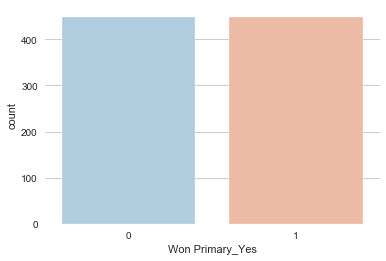

In [27]:
# combine majority and upsampled minority
oversampled_data = pd.concat([lost, won_oversampled])

# check new class counts
print(oversampled_data['Won Primary_Yes'].value_counts())


sns.set_style('whitegrid')
sns.countplot(x='Won Primary_Yes',data=oversampled_data, palette='RdBu_r')

In [35]:
# trying logistic regression again with the balanced dataset
y_train = oversampled_data['Won Primary_Yes']
X_train = oversampled_data.drop('Won Primary_Yes', axis=1)


# oversampled_dt = DecisionTreeClassifier(max_depth=5)
oversampled_lr = LogisticRegression(solver='liblinear')


# oversampled_dt.fit(X_train, y_train)
oversampled_lr.fit(X_train, y_train)


# oversampled_pred = oversampled_dt.predict(X_test)
oversampled_pred =oversampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, oversampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, oversampled_pred))


Test Accuracy score:  0.60625
Test F1 score:  0.5116279069767442


### Scale the final data

In [36]:
scaler = StandardScaler()  
scaler.fit(X_train)

#Use the .transform() method to transform the features to a scaled version.
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### Model Fitting

#### Logistic Regression


In [30]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [37]:
# Logistic Regression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# Create a classification report for the model on training data
preds_train = logmodel.predict(X_train)
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[316 133]
 [147 302]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       449
           1       0.69      0.67      0.68       449

   micro avg       0.69      0.69      0.69       898
   macro avg       0.69      0.69      0.69       898
weighted avg       0.69      0.69      0.69       898



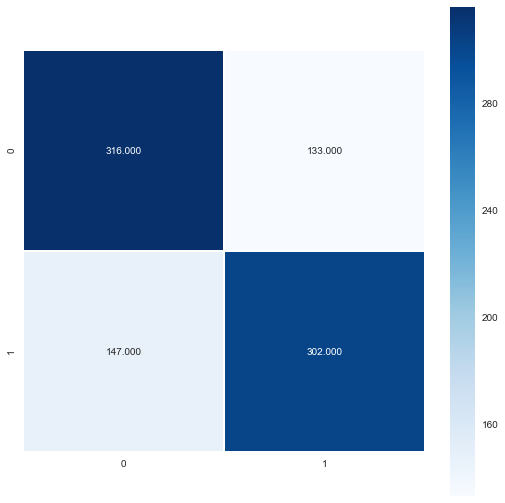

In [39]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [563]:
# Create a classification report for the model on testing data
preds_test = logmodel.predict(X_test)
print(confusion_matrix(y_test, preds_test))
print(classification_report(y_test, preds_test))

[[79 32]
 [18 31]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       111
           1       0.49      0.63      0.55        49

   micro avg       0.69      0.69      0.69       160
   macro avg       0.65      0.67      0.66       160
weighted avg       0.72      0.69      0.70       160



In [562]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, preds_train))
print('Testing F1 Score:', f1_score(y_test, preds_test))

Training F1 Score: 0.6832579185520363
Testing F1 Score: 0.5535714285714285


#### KNN

In [64]:
# Using KNN

from sklearn.neighbors import KNeighborsClassifier

In [565]:
# Create a KNN model

knn = KNeighborsClassifier()

In [566]:
# Fit this KNN model to the training data.

knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[331 118]
 [ 60 389]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       449
           1       0.77      0.87      0.81       449

   micro avg       0.80      0.80      0.80       898
   macro avg       0.81      0.80      0.80       898
weighted avg       0.81      0.80      0.80       898



In [567]:
#Predictions and Evaluations

pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[74 37]
 [24 25]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       111
           1       0.40      0.51      0.45        49

   micro avg       0.62      0.62      0.62       160
   macro avg       0.58      0.59      0.58       160
weighted avg       0.65      0.62      0.63       160



In [568]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, pred_train))
print('Testing F1 Score:', f1_score(y_test, pred_test))

Training F1 Score: 0.8138075313807532
Testing F1 Score: 0.45045045045045046


#### Decision Tree Model

In [456]:
# Training a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [569]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [570]:
#predict the training set
predictions_train = dtree.predict(X_train)

In [571]:
#predict the testing set
predictions_test = dtree.predict(X_test)

In [572]:
# Predictions and Evaluation of Decision Tree on Training Set

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

[[434  15]
 [ 16 433]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       449
           1       0.97      0.96      0.97       449

   micro avg       0.97      0.97      0.97       898
   macro avg       0.97      0.97      0.97       898
weighted avg       0.97      0.97      0.97       898



In [573]:
# Predictions and Evaluation of Decision Tree on Testing Set

print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       111
           1       0.29      0.20      0.24        49

   micro avg       0.60      0.60      0.60       160
   macro avg       0.49      0.49      0.48       160
weighted avg       0.56      0.60      0.58       160

[[86 25]
 [39 10]]


In [574]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, predictions_train))
print('Testing F1 Score:', f1_score(y_test, predictions_test))

Training F1 Score: 0.9654403567447046
Testing F1 Score: 0.23809523809523808


#### Random Forest Model

In [575]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)

In [576]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [577]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [578]:
rfc_pred = rfc.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.65
Test F1 score:  0.37777777777777777


### Hyperparameter Tuning

In [311]:
#import libraries

from sklearn.model_selection import RandomizedSearchCV

#### Logistic Regression


In [598]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters_lr = dict(C=C, penalty=penalty)

In [599]:
# Use gridsearch with our pipeline to find best parameters

gs_lr = RandomizedSearchCV(estimator=logmodel,
                           param_distributions=hyperparameters_lr,
                           scoring='f1',
                           cv=5)

In [600]:
# Fit the gridsearch object to the data

gs_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [601]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_lr.best_params_)

# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr.best_score_)

# Predict on test data with best params
y_pred = gs_lr.predict(X_test)

# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'penalty': 'l1', 'C': 0.1}
Best training accuracy: 0.666
Test set F1 score for best params: 0.512 


In [602]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70       111
           1       0.43      0.63      0.51        49

   micro avg       0.63      0.63      0.63       160
   macro avg       0.61      0.63      0.61       160
weighted avg       0.68      0.63      0.64       160

[[70 41]
 [18 31]]


#### KNN

In [583]:
# Create the dictionary of hyperparameters we want to test

neighbors = list(range(1, 20, 2))
grid_params_KNN = {'n_neighbors': neighbors,
                    'weights': ['uniform', 'distance']}

In [584]:
# Use gridsearch with our pipeline to find best parameters

gs_KNN = RandomizedSearchCV(estimator=knn,
                      param_distributions=grid_params_KNN,
                      scoring='f1',
                      cv=5)

In [585]:
# Fit the gridsearch object to the data
gs_KNN.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [586]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_KNN.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_KNN.best_score_)
# Predict on test data with best params
y_pred = gs_KNN.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'weights': 'distance', 'n_neighbors': 5}
Best training accuracy: 0.805
Test set F1 score for best params: 0.433 


In [587]:
# Predictions and Evaluation of KNN on Testing Set
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       111
           1       0.44      0.43      0.43        49

   micro avg       0.66      0.66      0.66       160
   macro avg       0.59      0.59      0.59       160
weighted avg       0.65      0.66      0.66       160

[[84 27]
 [28 21]]


#### Decision Tree Model

In [588]:
# Create the dictionary of hyperparameters we want to test

tree_depth_range = list(range(1, 20,1))
max_features_range = list(range(1, 10,1))
min_impurity_decrease_range=list(range(0, 1))
grid_params_dt = {'max_depth': tree_depth_range,
                   'max_features': max_features_range,
                   'min_impurity_decrease':min_impurity_decrease_range,
                   'min_samples_split': list(range(2, 20,1)),
                  'criterion': ['gini', 'entropy']}

In [589]:
# Use RandomizedSearchCV with our pipeline to find best parameters

gs_dt = RandomizedSearchCV(estimator=dtree,
                           param_distributions = grid_params_dt,
                           scoring='f1',
                           cv=5)

In [590]:
# Fit the RandomizedSearch object to the data
gs_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_impurity_decrease': [0], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [659]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_dt.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_dt.best_score_)
# Predict on test data with best params
y_pred = gs_dt.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'min_samples_split': 9, 'min_impurity_decrease': 0, 'max_features': 2, 'max_depth': 17, 'criterion': 'entropy'}
Best training accuracy: 0.678
Test set F1 score for best params: 0.380 


In [660]:
# Predictions and Evaluation of Decision Tree on Testing Set
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       111
           1       0.37      0.39      0.38        49

   micro avg       0.61      0.61      0.61       160
   macro avg       0.55      0.55      0.55       160
weighted avg       0.62      0.61      0.61       160

[[79 32]
 [30 19]]


#### Random Forest Model

In [661]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_features': [0.05,0.10,0.20,0.25, 0.33, 0.5 ],
    'max_depth' : list(range(1,8,1)),
    'min_samples_leaf': [0.01,0.03,0.04,0.05,0.06]
}

In [664]:
CV_rfc = RandomizedSearchCV(
    estimator=rfc, param_distributions=param_grid, cv=10, n_jobs=-1)

In [665]:
CV_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300], 'max_features': [0.05, 0.1, 0.2, 0.25, 0.33, 0.5], 'max_depth': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [0.01, 0.03, 0.04, 0.05, 0.06]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [642]:
print('Best params: %s' %(CV_rfc.best_params_))

rfc_pred = CV_rfc.best_estimator_.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Best params: {'n_estimators': 300, 'min_samples_leaf': 0.05, 'max_features': 0.33, 'max_depth': 7}
Test Accuracy score:  0.65
Test F1 score:  0.540983606557377


In [643]:
# Predictions and Evaluation of Random Forest on Testing Set
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[71 40]
 [16 33]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       111
           1       0.45      0.67      0.54        49

   micro avg       0.65      0.65      0.65       160
   macro avg       0.63      0.66      0.63       160
weighted avg       0.70      0.65      0.66       160



In [639]:
Dem_Midterm_Primary_Final.head()

,Partisan Lean,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,...,Gender_Male,Race_White,Veteran?_Yes,LGBTQ?_Yes,Elected Official?_Yes,STEM?_Yes,Won Primary_Yes,Partisan Lean X Uneducated Whits,Partisan Lean X HH Income,Partisan Lean X Rural %
0,-0.2888,0.287923,0.032323,0.348049,0.023874,0.513279,0.379781,0.168119,39255.893333,0.099535,...,1,0,1,0,0,0,0,-0.043687,-11337.101602,-0.187904
1,-0.2888,0.287923,0.032323,0.348049,0.023874,0.513279,0.379781,0.168119,39255.893333,0.099535,...,1,1,0,1,0,0,0,-0.043687,-11337.101602,-0.187904
2,-0.2888,0.287923,0.032323,0.348049,0.023874,0.513279,0.379781,0.168119,39255.893333,0.099535,...,1,1,1,0,0,0,0,-0.043687,-11337.101602,-0.187904
3,-0.2888,0.287923,0.032323,0.348049,0.023874,0.513279,0.379781,0.168119,39255.893333,0.099535,...,1,0,1,0,1,0,0,-0.043687,-11337.101602,-0.187904
4,-0.2888,0.287923,0.032323,0.348049,0.023874,0.513279,0.379781,0.168119,39255.893333,0.099535,...,0,1,0,0,1,0,0,-0.043687,-11337.101602,-0.187904


## 6. Model Evaluation

### Without scaling

#### Logistic Regression

#### KNN

#### Decision Tree

#### Random Forest

Best params: {'n_estimators': 200, 'min_samples_leaf': 0.03, 'max_features': 0.33, 'max_depth': 4}
Test Accuracy score:  0.65625
Test F1 score:  0.5528455284552845

In [425]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[71 40]
 [15 34]]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       111
           1       0.46      0.69      0.55        49

   micro avg       0.66      0.66      0.66       160
   macro avg       0.64      0.67      0.64       160
weighted avg       0.71      0.66      0.67       160



## 7. Final Model

### Logistic Regression

In [629]:
final_model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [630]:
final_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [631]:
#predict the training set
final_preds_train = final_model.predict(X_train)

In [632]:
#predict the testing set
final_preds_test = final_model.predict(X_test)

In [633]:
print('Training F1 Score:', f1_score(y_train, final_preds_train))
print('Testing F1 Score:', f1_score(y_test, final_preds_test))

Training F1 Score: 0.6832579185520363
Testing F1 Score: 0.5535714285714285


In [638]:
# Model Accuracy, how often is the classifier correct?
print('Test Accuracy score: ', accuracy_score(y_test, preds_test))

Test Accuracy score:  0.6875


In [634]:
# Predictions and Evaluation of Decision Tree on Training Set

print(classification_report(y_train, final_preds_train))
print(confusion_matrix(y_train, final_preds_train))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       449
           1       0.69      0.67      0.68       449

   micro avg       0.69      0.69      0.69       898
   macro avg       0.69      0.69      0.69       898
weighted avg       0.69      0.69      0.69       898

[[316 133]
 [147 302]]


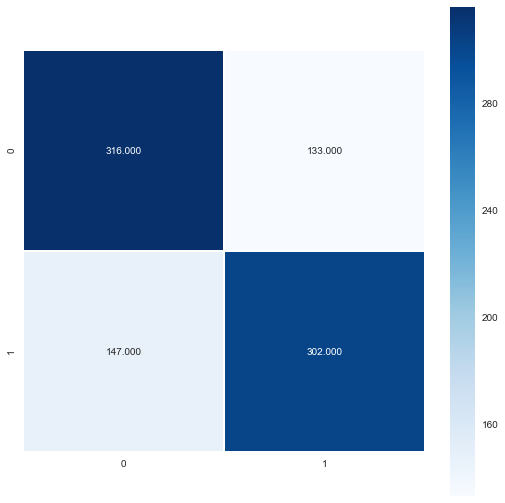

In [635]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, final_preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [636]:
# Predictions and Evaluation of Decision Tree on Testing Set

print(classification_report(y_test, final_preds_test))
print(confusion_matrix(y_test, final_preds_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       111
           1       0.49      0.63      0.55        49

   micro avg       0.69      0.69      0.69       160
   macro avg       0.65      0.67      0.66       160
weighted avg       0.72      0.69      0.70       160

[[79 32]
 [18 31]]


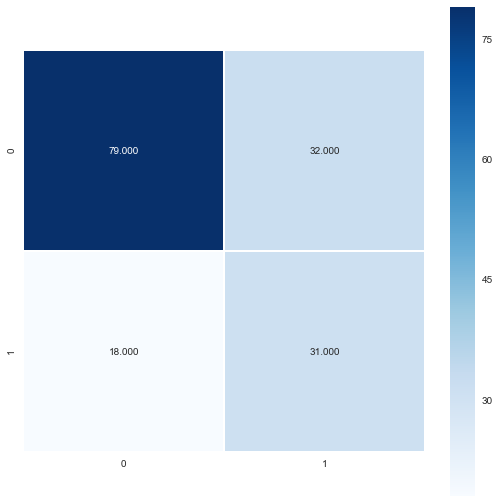

In [637]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, final_preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [649]:
model_params = list(zip(X.columns, final_model.coef_[0]))

model_params.sort(key = lambda x: x[1], reverse=True)
model_params

[('black_pct', 0.9262263541620813),
 ('hispanic_pct', 0.8965214046937131),
 ('lesscollege_whites_pct', 0.6906162626387121),
 ('Elected Official?_Yes', 0.40687264120290206),
 ('age65andolder_pct', 0.2766392709309708),
 ('Partisan Lean X HH Income', 0.2379032744412554),
 ('foreignborn_pct', 0.2203907397440936),
 ('age29andunder_pct', 0.10199933562381727),
 ('lesshs_pct', 0.07695902850365927),
 ('LGBTQ?_Yes', 0.05929566977667561),
 ('Veteran?_Yes', 0.03480245011341487),
 ('female_pct', 0.00395891133924731),
 ('Race_White', -0.032704158501409904),
 ('Partisan Lean X Rural %', -0.10150475120276455),
 ('STEM?_Yes', -0.11103695212206192),
 ('clf_unemploy_pct', -0.1655757745783834),
 ('median_hh_inc', -0.335506827763685),
 ('lesshs_whites_pct', -0.3498158084771811),
 ('Partisan Lean X Uneducated Whits', -0.4382957668935798),
 ('rural_pct', -0.47798805246689496),
 ('Partisan Lean', -0.4909218754533776),
 ('Gender_Male', -0.5819255516697597),
 ('lesscollege_pct', -0.7263626374584764),
 ('nonwhit

## 8. Document in the markdown cells below how you did paired programming.

### How we did paired programming:
- !!!

Additional details on paired programming: